# Decision Tree Classification

A decision tree classifier is a supervised learning method used for classification and regression known for its interpretability due to its flowchart-like tree structure. This template trains, tunes, and visualizes a decision tree for a **classification** problem. If you would like to learn more about decision trees, take a look at DataCamp's [Machine Learning with Tree-Based Models in Python](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python) course.

To swap in your dataset in this template, the following is required:
- There are at least two feature columns and a column with a categorical target variable you would like to predict.
- The features have been cleaned and preprocessed, including categorical encoding. DataCamp has a [course on preprocessing](https://app.datacamp.com/learn/courses/preprocessing-for-machine-learning-in-python) if you need more guidance.
- There are no NaN/NA values. You can use [this template to impute missing values](https://app.datacamp.com/workspace/templates/recipe-python-impute-missing-data) if needed.

The placeholder dataset in this template is consists of hotel booking data with details, such as length of stay and how the booking was made. Each row represents a booking and whether the booking was canceled (the target variable). You can find more information on this dataset's source and dictionary [here](https://app.datacamp.com/workspace/datasets/dataset-python-hotel-booking-demand).

### 1. Loading packages and data

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

# Load the data and replace with your CSV file path
df = pd.read_csv("data/hotel_bookings_clean.csv")
df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,meal_BB,meal_FB,meal_HB,meal_No_meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA_TO,market_segment_Online_TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA_TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0,0,0,0,0,0,75.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0,0,0,0,0,0,75.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0,0,0,0,0,1,98.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [2]:
# Check if there are any null values
print(df.isnull().sum())

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups       

In [3]:
# Check columns to make sure you have features and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   babies                          119210 non-null  int64  
 9   is_repeated_guest               119210 non-null  int64  
 10  previous_cancellations          119210 non-null  int64  
 11  previous_bookings_not_canceled  119210 non-null  int64  
 12  required_car_par

### 2. Splitting the data
To split the data, we'll use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. 

In [4]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df.iloc[:, 1:]  # Specify at least two columns as features
y = df["is_canceled"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83447, 51), (35763, 51), (83447,), (35763,))

### 3. Building a decision tree classifier

The following code builds a scikit-learn `DecisionTreeClassifier` using the most fundamental parameters. As a reminder, you can learn more about these parameters in DataCamp's [Machine Learning with Tree-Based Models in Python](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python) course and [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [5]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 6,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

To evaluate this classifier, we will use accuracy and implement it with sklearn's [metrics.accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. Accuracy may not be the best evaluation metric for your problem, especially if your dataset has class imbalance (in which case [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) or [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) may be more suitable). 

In [6]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8002125101361742


### 4. Visualizing a decision tree

You can visualize your trained DecisionTreeClassifier using sklearn's [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

[Text(0.6, 0.9166666666666666, 'deposit_type_Non_Refund <= 0.5\ngini = 0.467\nsamples = 83447\nvalue = [52462, 30985]'),
 Text(0.4, 0.75, 'lead_time <= 11.5\ngini = 0.407\nsamples = 73198\nvalue = [52398, 20800]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.196\nsamples = 16522\nvalue = [14705, 1817]'),
 Text(0.6, 0.5833333333333334, 'previous_cancellations <= 0.5\ngini = 0.446\nsamples = 56676\nvalue = [37693, 18983]'),
 Text(0.4, 0.4166666666666667, 'market_segment_Online_TA <= 0.5\ngini = 0.433\nsamples = 55098\nvalue = [37607, 17491]'),
 Text(0.2, 0.25, 'gini = 0.302\nsamples = 23483\nvalue = [19136, 4347]'),
 Text(0.6, 0.25, 'total_of_special_requests <= 0.5\ngini = 0.486\nsamples = 31615\nvalue = [18471, 13144]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.466\nsamples = 11479\nvalue = [4252, 7227]'),
 Text(0.8, 0.08333333333333333, 'gini = 0.415\nsamples = 20136\nvalue = [14219, 5917]'),
 Text(0.8, 0.4166666666666667, 'gini = 0.103\nsamples = 1578\nvalue = [86, 1492]'),
 Text(0.8, 

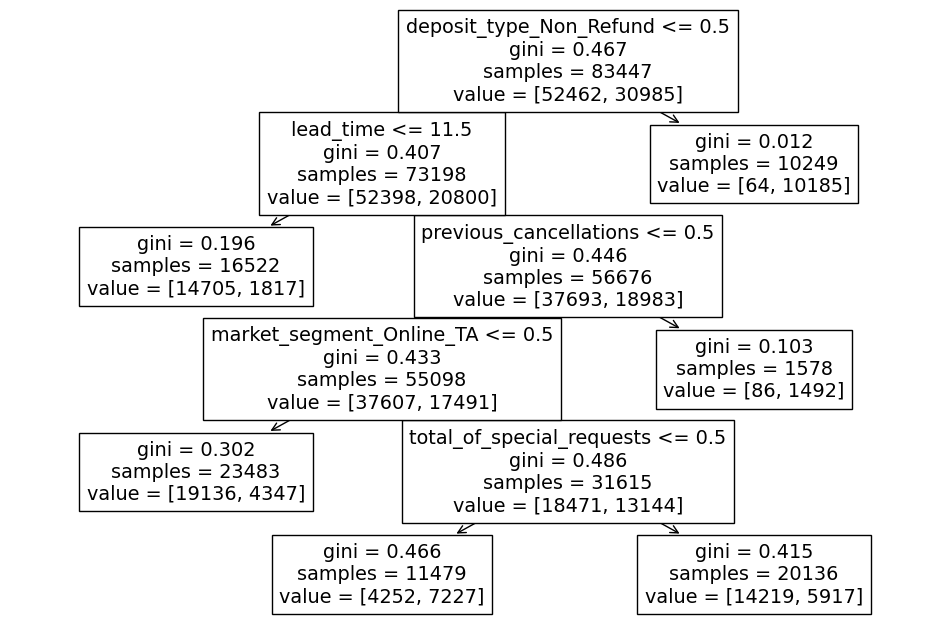

In [7]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns)

### 5. Hyperparameter tuning with random search

Hyperparameter tuning is considered best practice to improve the efficiency and effectiveness of your machine learning model. In this section, we'll use random search where a fixed number of hyperparameter settings is sampled from specified probability distributions. 

In [8]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    random_state=123,
)

# Train the model on the training set
clf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END 

Experiment with the parameter grid until you are satisfied with the model's performance! Then, you can test the best parameters found on your test set (`X_test`, `y_test`). To learn more about random search and other hyperparameter tuning options, such as grid search, check out DataCamp's [Hyperparameter Tuning in Python](https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python) course.